## Importación de las librerías 

In [4]:
import utils
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

## Conjuntos de entrenamiento y test y CV controller

In [5]:
X_train, X_test, y_train, y_test = utils.get_train_test_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7776, 12) (1022, 12) (7776,) (1022,)


In [6]:
cv = utils.get_stratified_shuffle_cv()
print(cv)

StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8)


## Carga del mejor árbol de clasificación

Este será el árbol que se empleará para realizar el **gradient boosting**

In [7]:
decision_tree_model = pickle.load(open('/kaggle/input/decision-tree-model/decision_tree_model.sav', 'rb'))
print(decision_tree_model.criterion)
decision_tree_model

gini


DecisionTreeClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41,
                       random_state=99)

## Búsqueda del parámetro learning_rate del gradient boosting

In [9]:
param_grid = {
    'n_estimators': list(range(10,501,50)),
    'learning_rate': [0.1, 0.05, 0.03, 0.01, 0.005, 0.001]
}

grid_search_cv = GridSearchCV(
    GradientBoostingClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.4s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.3s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   2.3s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   2.4s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   2.4s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   2.3s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   2.3s
[CV] END ................learning_rate=0.1, n_estimators=110; total time=   4.4s
[CV] END ................learning_rate=0.1, n_e

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=GradientBoostingClassifier(max_depth=20,
                                                  min_samples_leaf=14,
                                                  min_samples_split=41,
                                                  random_state=99),
             param_grid={'learning_rate': [0.1, 0.05, 0.03, 0.01, 0.005, 0.001],
                         'n_estimators': [10, 60, 110, 160, 210, 260, 310, 360,
                                          410, 460]},
             scoring='roc_auc', verbose=2)

Seleccionamos el valor del **learning rate** como 0.03

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

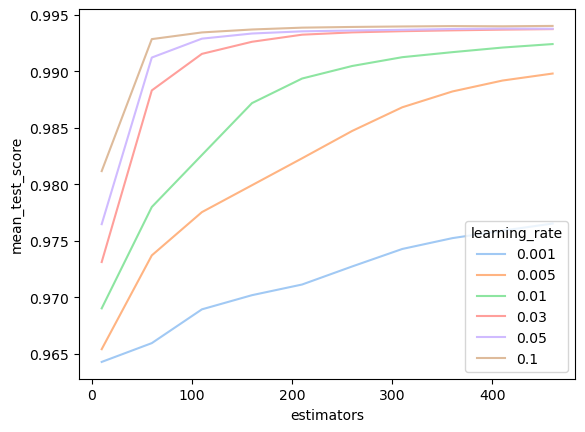

In [10]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
learning_rate_list = list(grid_search_cv.cv_results_['param_learning_rate'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
gradient_boosting_df = pd.DataFrame(list(zip(estimators_list, learning_rate_list, mean_test_score_list)), columns=['estimators', 'learning_rate', 'mean_test_score'])
sns.lineplot(data=gradient_boosting_df, x="estimators", y="mean_test_score", hue="learning_rate", legend="full", palette="pastel")

In [11]:
gradient_boosting_df.sort_values(['learning_rate', 'estimators', 'mean_test_score'])[['learning_rate', 'estimators', 'mean_test_score']]

,learning_rate,estimators,mean_test_score
50,0.001,10,0.964285
51,0.001,60,0.965949
52,0.001,110,0.968939
53,0.001,160,0.970193
54,0.001,210,0.971137
55,0.001,260,0.972736
56,0.001,310,0.974283
57,0.001,360,0.975242
58,0.001,410,0.975903
59,0.001,460,0.976531


## Búsqueda del parámetro subsamples (sthocastic gradient boosting) del gradient boosting

In [12]:
param_grid = {
    'n_estimators': list(range(10,201,30)),
    'subsample': list(np.arange(0.1,1.01,0.1))
}

grid_search_cv = GridSearchCV(
    GradientBoostingClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41, learning_rate=0.03, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END .....................n_estimators=10, subsample=0.1; total time=   0.0s
[CV] END .....................n_estimators=10, subsample=0.1; total time=   0.0s
[CV] END .....................n_estimators=10, subsample=0.1; total time=   0.0s
[CV] END .....................n_estimators=10, subsample=0.1; total time=   0.0s
[CV] END .....................n_estimators=10, subsample=0.1; total time=   0.0s
[CV] END .....................n_estimators=10, subsample=0.2; total time=   0.1s
[CV] END .....................n_estimators=10, subsample=0.2; total time=   0.1s
[CV] END .....................n_estimators=10, subsample=0.2; total time=   0.1s
[CV] END .....................n_estimators=10, subsample=0.2; total time=   0.1s
[CV] END .....................n_estimators=10, subsample=0.2; total time=   0.1s
[CV] END .....n_estimators=10, subsample=0.30000000000000004; total time=   0.1s
[CV] END .....n_estimators=10, subsample=0.3000

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=GradientBoostingClassifier(learning_rate=0.03,
                                                  max_depth=20,
                                                  min_samples_leaf=14,
                                                  min_samples_split=41,
                                                  random_state=99),
             param_grid={'n_estimators': [10, 40, 70, 100, 130, 160, 190],
                         'subsample': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                       0.6, 0.7000000000000001, 0.8, 0.9,
                                       1.0]},
             scoring='roc_auc', verbose=2)

Escogemos como max_samples 0.6, ya que apartir de alli no hay mejora significativa

<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

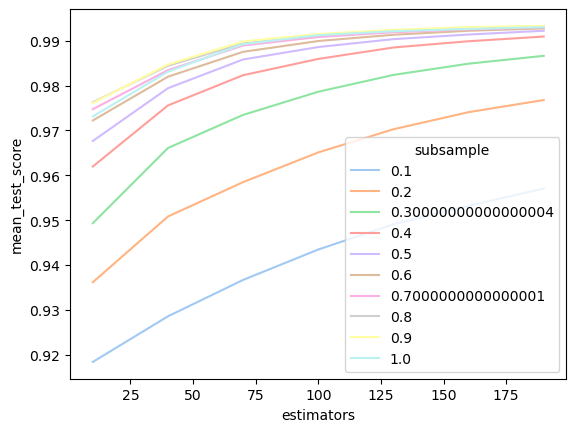

In [13]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
subsample_list = list(grid_search_cv.cv_results_['param_subsample'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
gradient_boosting_df = pd.DataFrame(list(zip(estimators_list, subsample_list, mean_test_score_list)), columns=['estimators', 'subsample', 'mean_test_score'])
sns.lineplot(data=gradient_boosting_df, x="estimators", y="mean_test_score", hue="subsample", legend="full", palette="pastel")

## Búsqueda del parámetro n_estimators del gradient boosting

Llegaremos hasta 500 ya que a partir de alli no hay mejora significativa

In [15]:
param_grid = {
    'n_estimators': list(range(10,300,20)),
}

grid_search_cv = GridSearchCV(
    GradientBoostingClassifier(max_depth=20, min_samples_leaf=14, min_samples_split=41,
                               learning_rate=0.03, subsample=0.6, random_state=99),
    param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=2
)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=30; total time=   0.7s
[CV] END ....................................n_estimators=30; total time=   0.6s
[CV] END ....................................n_estimators=30; total time=   0.6s
[CV] END ....................................n_estimators=30; total time=   0.6s
[CV] END ....................................n_estimators=30; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   1.1s
[CV] END ....................................n_e

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=99, test_size=0.2,
            train_size=0.8),
             estimator=GradientBoostingClassifier(learning_rate=0.03,
                                                  max_depth=20,
                                                  min_samples_leaf=14,
                                                  min_samples_split=41,
                                                  random_state=99,
                                                  subsample=0.6),
             param_grid={'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150,
                                          170, 190, 210, 230, 250, 270, 290]},
             scoring='roc_auc', verbose=2)

Decidimos que el número de árboles a usar será: **10** ya que la mejora desde allí es insignificativa, además es un modelo menos sobrejustado

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


<AxesSubplot:xlabel='estimators', ylabel='mean_test_score'>

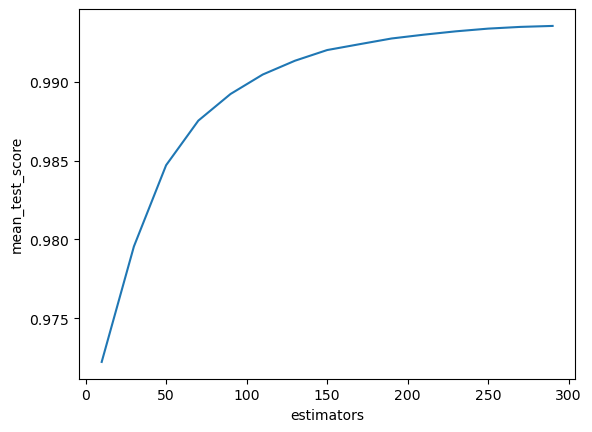

In [16]:
estimators_list = list(grid_search_cv.cv_results_['param_n_estimators'].data)
mean_test_score_list = list(grid_search_cv.cv_results_['mean_test_score'])
gradient_boosting_df = pd.DataFrame(list(zip(estimators_list, mean_test_score_list)), columns=['estimators', 'mean_test_score'])
gradient_boosting_df['mean_test_score_shift'] = gradient_boosting_df['mean_test_score'].shift().fillna(0)
gradient_boosting_df['diff'] = (gradient_boosting_df['mean_test_score'] - gradient_boosting_df['mean_test_score_shift'])
sns.lineplot(data=gradient_boosting_df, x="estimators", y="mean_test_score", legend="full", palette="pastel")

In [17]:
gradient_boosting_df

,estimators,mean_test_score,mean_test_score_shift,diff
0,10,0.972226,0.000000,0.972226
1,30,0.979550,0.972226,0.007324
2,50,0.984703,0.979550,0.005153
3,70,0.987529,0.984703,0.002826
4,90,0.989219,0.987529,0.001690
5,110,0.990453,0.989219,0.001234
6,130,0.991329,0.990453,0.000875
7,150,0.992006,0.991329,0.000677
8,170,0.992375,0.992006,0.000369
9,190,0.992739,0.992375,0.000364


**Modelo de gradient boosting**

Confusion matrix, without normalization
[[840 132]
 [ 28  22]]


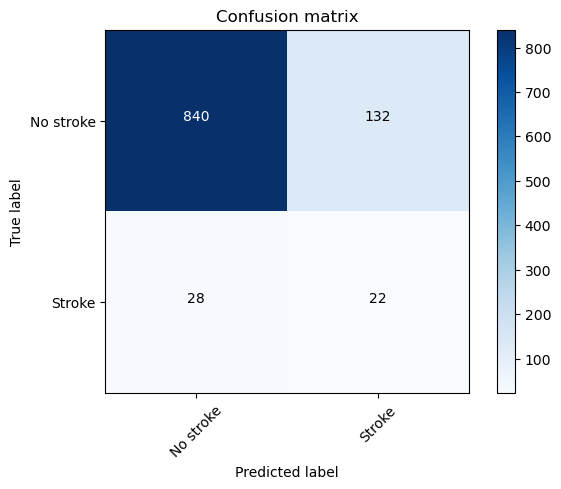

In [23]:
gradient_boosting_model = GradientBoostingClassifier(
    max_depth=20, min_samples_leaf=14, min_samples_split=41,
    learning_rate=0.03, n_estimators=10, random_state=99, subsample=0.6
)

gradient_boosting_model.fit(X_train, y_train)
y_pred = gradient_boosting_model.predict(X_test)

cm = utils.get_confusion_matrix(y_test, y_pred)
utils.plot_confusion_matrix(cm=cm, classes=['No stroke', 'Stroke'])

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.14      0.44      0.22        50

    accuracy                           0.84      1022
   macro avg       0.56      0.65      0.56      1022
weighted avg       0.93      0.84      0.88      1022



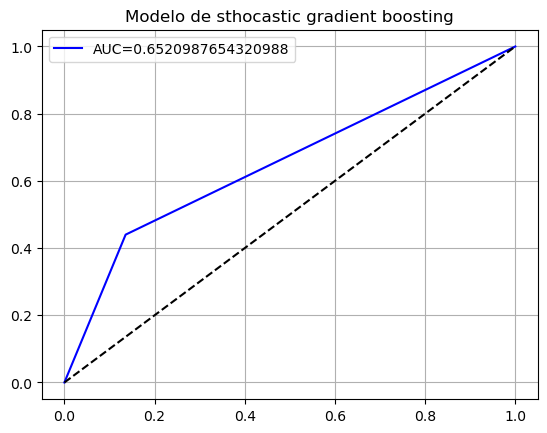

In [24]:
utils.print_metrics(y_test, y_pred, "Modelo de sthocastic gradient boosting")

## Importancia de las variables

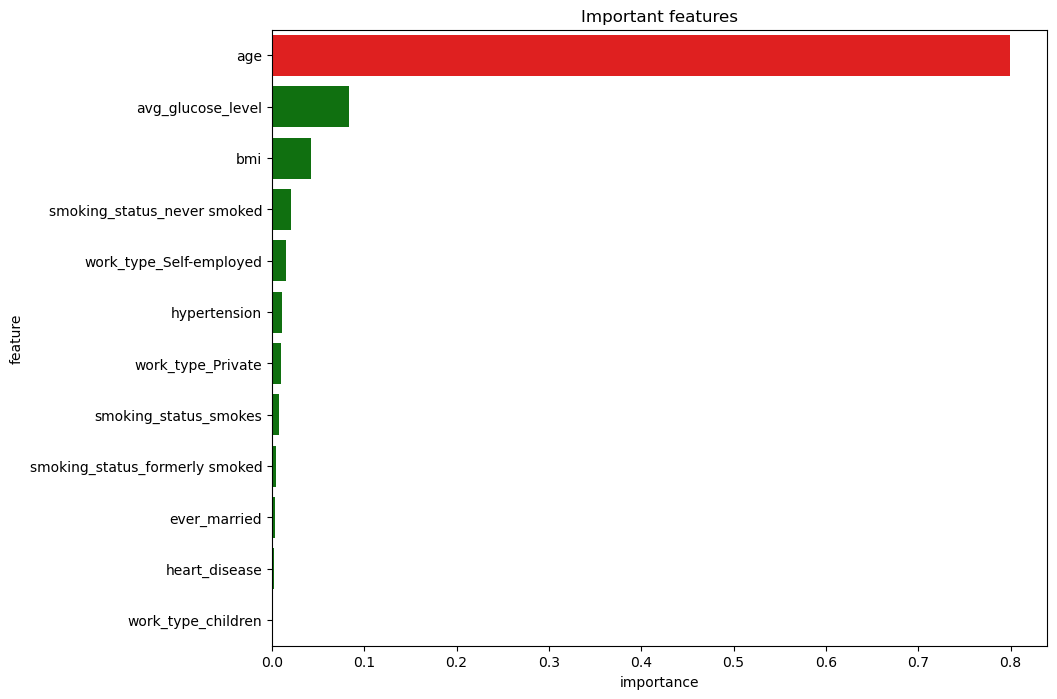

In [25]:
utils.plot_tree_feature_importance(gradient_boosting_model.feature_names_in_, gradient_boosting_model.feature_importances_)

**Guardamos el modelo para la comparativa final**

In [26]:
pickle.dump(gradient_boosting_model, open("gradient_boosting_model.sav", 'wb'))